In [62]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [63]:
credentials = json.load(open('authorisation.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlist.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [64]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [65]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
uri
username = uri.split(':')[1]
username
playlist_id = uri.split(':')[2]
playlist_id

'7iYMEZ05LkZLW8u4yu1kwM'

In [66]:
results = sp.user_playlist(username,playlist_id, 'tracks')


In [67]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_release_date = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])


In [21]:
features = sp.audio_features(playlist_tracks_id)


In [22]:
import numpy as np
import pandas as pd

In [23]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [24]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,0ce9G1z2SstCXHJ9gTg6PB,Pani da Rang (Male),Ayushmann Khurrana,[Ayushmann Khurrana],0.676,0.664,4,-7.260,0,0.1810,0.00021,0.199,0.528,98.022,239333,4
96,5gBW4PhXqiUVL8FJ5K9opo,Walk With Me,Taba Chake,[Taba Chake],0.708,0.316,10,-9.507,1,0.4470,0.00023,0.079,0.652,81.403,170012,4
97,5VSJ9OfZx8V91A7u8Fuoh1,Aaoge Tum Kabhi,The Local Train,[The Local Train],0.534,0.863,0,-4.616,1,0.0152,0.01670,0.144,0.374,98.006,313163,4
98,03HZm1iCO3y8GTFv7yobL3,Aajkal Tere Mere Pyar Ke Charche,Suman Kalyanpur,"[Suman Kalyanpur, Mohammed Rafi]",0.555,0.792,9,-10.683,1,0.8580,0.00720,0.596,0.776,98.634,309493,4
99,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,[Harry Styles],0.548,0.816,0,-4.209,1,0.1220,0.00000,0.335,0.557,95.390,174000,4


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, 'Linkin Park'),
  Text(1, 0, 'Luz'),
  Text(2, 0, 'Harry Styles'),
  Text(3, 0, 'Bruno Major'),
  Text(4, 0, 'Lata Mangeshkar'),
  Text(5, 0, 'Asha Bhosle'),
  Text(6, 0, 'Britney Spears'),
  Text(7, 0, 'Sixpence None The Richer'),
  Text(8, 0, 'Backstreet Boys'),
  Text(9, 0, 'Daryl Hall & John Oates'),
  Text(10, 0, 'The Fratellis'),
  Text(11, 0, 'Porcupine Tree'),
  Text(12, 0, 'Neil Diamond'),
  Text(13, 0, 'Cage The Elephant'),
  Text(14, 0, 'Portugal. The Man'),
  Text(15, 0, 'The Weeknd'),
  Text(16, 0, 'David Bowie'),
  Text(17, 0, 'Katy Perry'),
  Text(18, 0, 'Train'),
  Text(19, 0, 'WALK THE MOON'),
  Text(20, 0, 'American

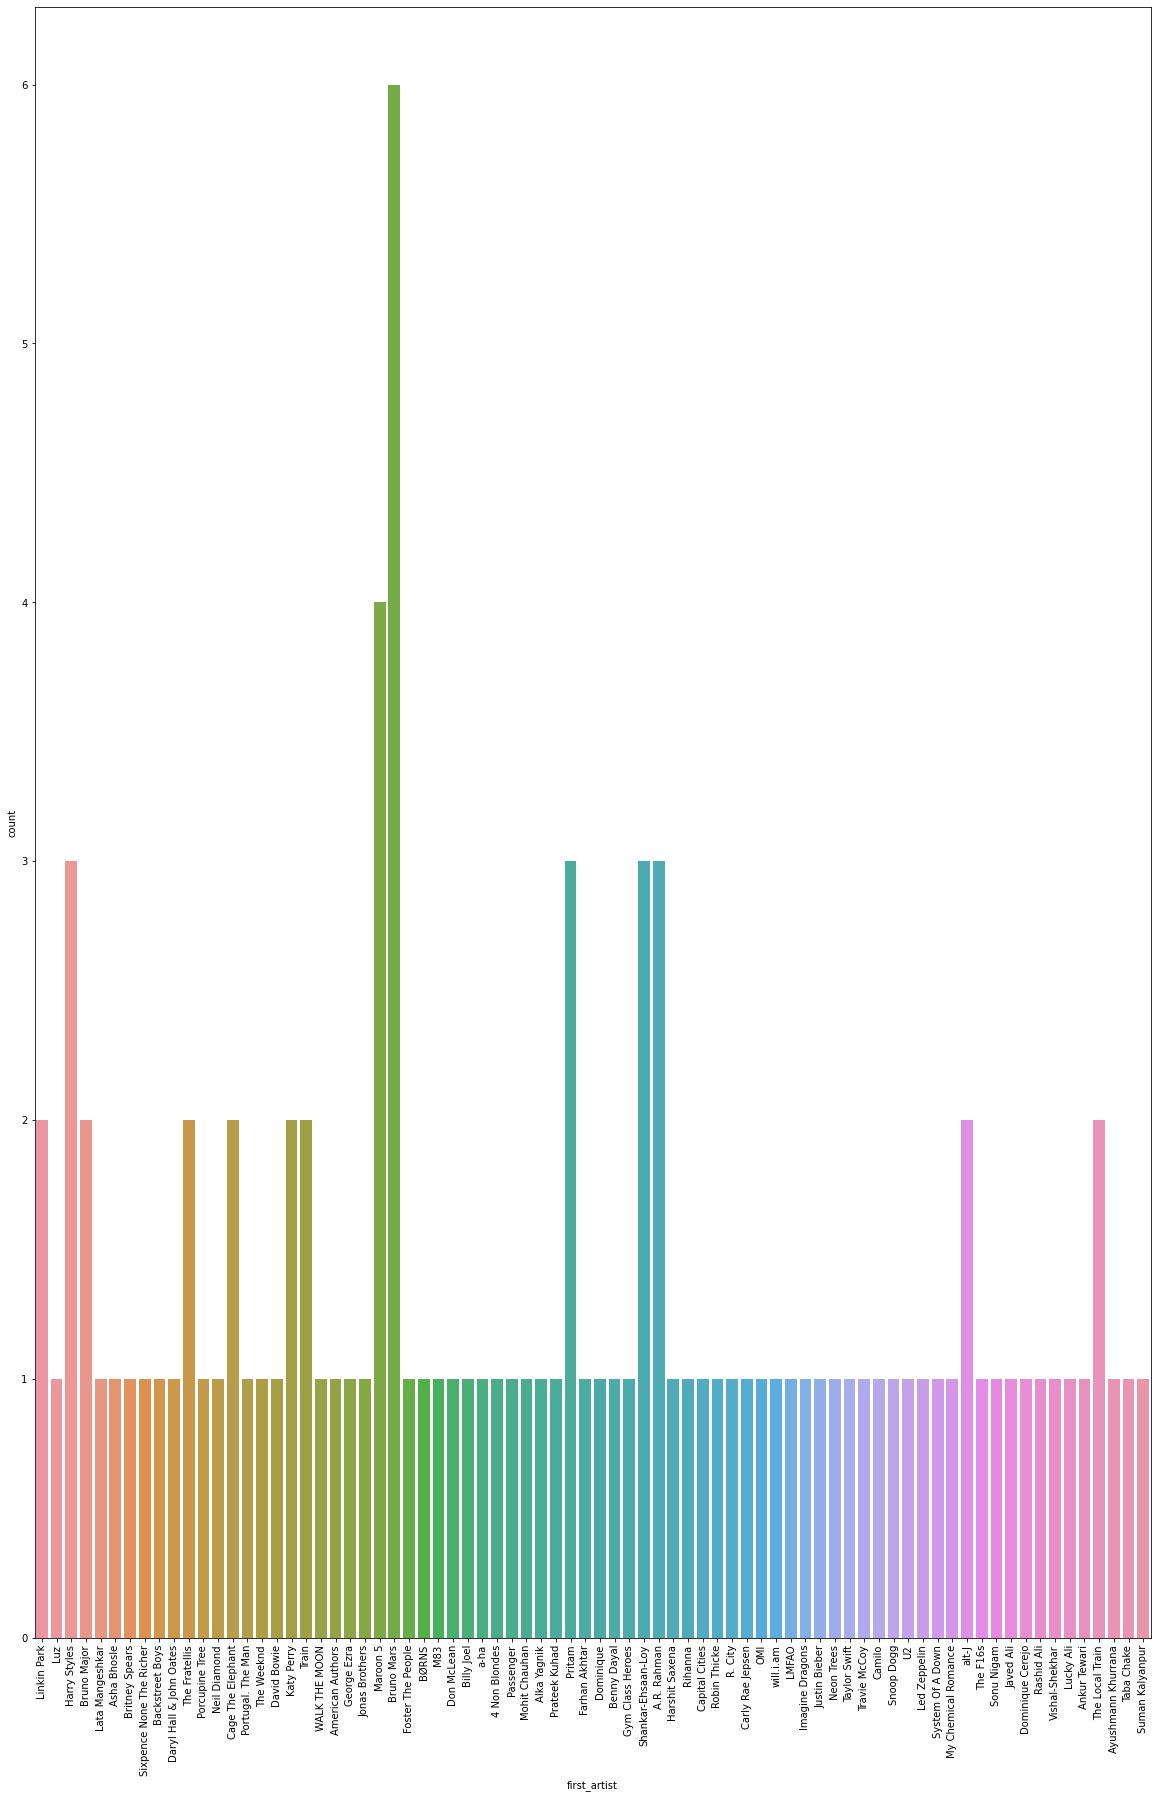

In [26]:
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [34]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,50):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

In [35]:
for i in range(50,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

Text(0.5, 0, 'num_segments')

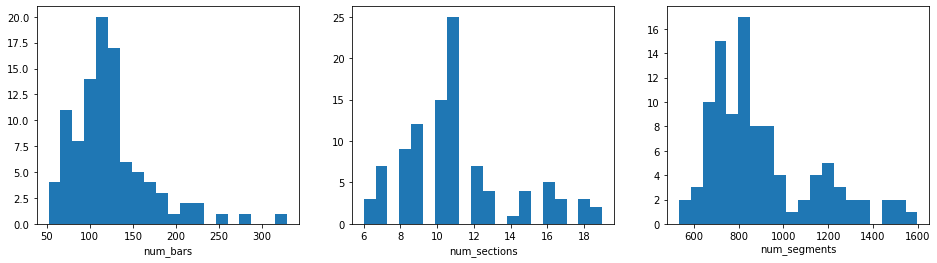

In [36]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [37]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,400lQTCx3wYGgqAIHSZbNA,Given Up,Linkin Park,[Linkin Park],0.655,0.885,7,-4.116,1,0.00117,0.000473,0.0448,0.9380,100.088,189293,4,77,6,735
1,0uqFo6F9DppKZtwm3zhG3s,the author,Luz,[Luz],0.354,0.264,0,-12.571,1,0.83200,0.000000,0.1100,0.2270,80.567,217213,4,75,10,721
2,1ZMiCix7XSAbfAJlEZWMCp,Falling,Harry Styles,[Harry Styles],0.567,0.267,4,-6.502,1,0.83900,0.000001,0.0890,0.0592,110.011,240133,4,110,12,693
3,2IAR0DziHCjSu16gR4ihvy,Nothing,Bruno Major,[Bruno Major],0.555,0.270,2,-15.892,1,0.93100,0.536000,0.1030,0.2740,139.691,162797,3,121,9,532
4,2njC2umOngBCOj14iHR8K8,Aaja Piya Tohe Pyar Doon,Lata Mangeshkar,"[Lata Mangeshkar, R. D. Burman]",0.613,0.290,7,-6.897,1,0.97800,0.000063,0.0991,0.5830,110.370,251414,4,114,13,835


In [38]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")